In [10]:
import cv2
import matplotlib.pyplot as plt
image_path='/content/download.jpeg'
bgr_img=cv2.imread(image_path)
gray_img=cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
rgb_img=cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

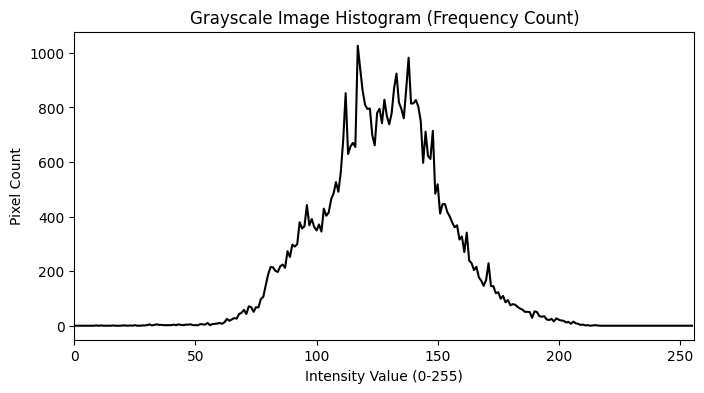

In [13]:
hist_gray = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 4))
plt.plot(hist_gray, color='black')
plt.title('Grayscale Image Histogram (Frequency Count)')
plt.xlabel('Intensity Value (0-255)')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])
plt.show()


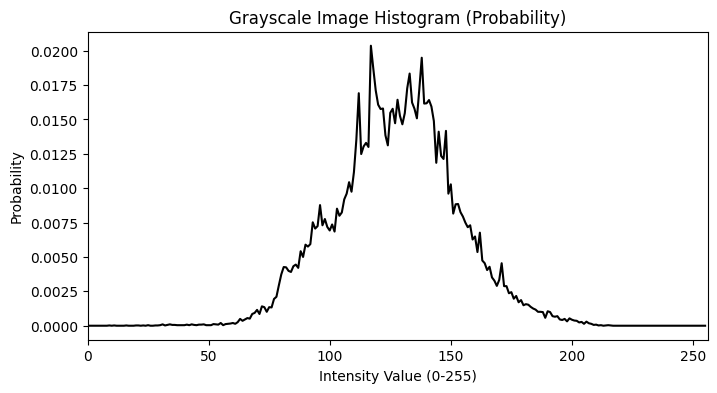

In [16]:
num_pixels = gray_img.shape[0] * gray_img.shape[1]
hist_gray_normalized = hist_gray / num_pixels

plt.figure(figsize=(8, 4))
plt.plot(hist_gray_normalized, color='black')
plt.title('Grayscale Image Histogram (Probability)')
plt.xlabel('Intensity Value (0-255)')
plt.ylabel('Probability')
plt.xlim([0, 256])
plt.show()


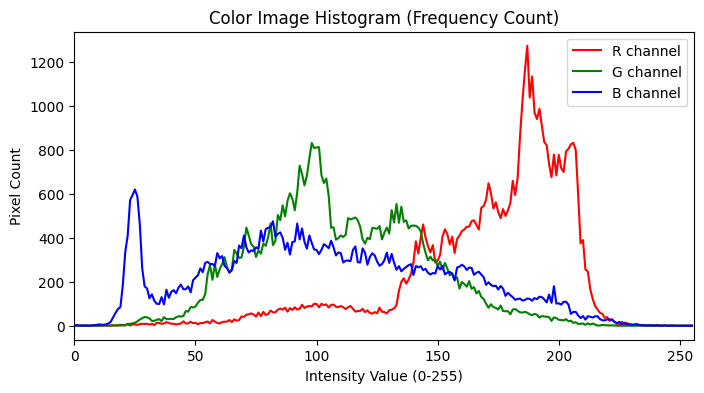

In [17]:
# Split the image into its RGB channels
channels = cv2.split(rgb_img)
colors = ('r', 'g', 'b')
plt.figure(figsize=(8, 4))

for channel, color in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'{color.upper()} channel')

plt.title('Color Image Histogram (Frequency Count)')
plt.xlabel('Intensity Value (0-255)')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])
plt.legend()
plt.show()


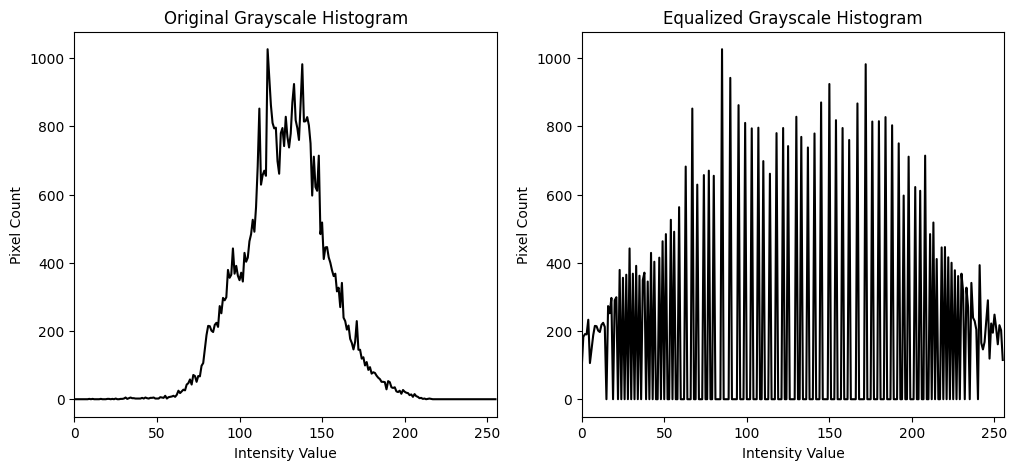

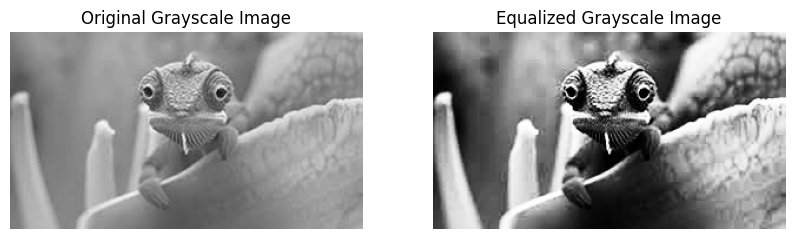

In [20]:
# Apply histogram equalization to the grayscale image
equalized_image_gray = cv2.equalizeHist(gray_img)

# Plot original vs. equalized histogram for comparison
hist_orig = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist_eq = cv2.calcHist([equalized_image_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_orig, color='black')
plt.title('Original Grayscale Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.plot(hist_eq, color='black')
plt.title('Equalized Grayscale Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])
plt.show()

# Display the images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_gray, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')
plt.show()


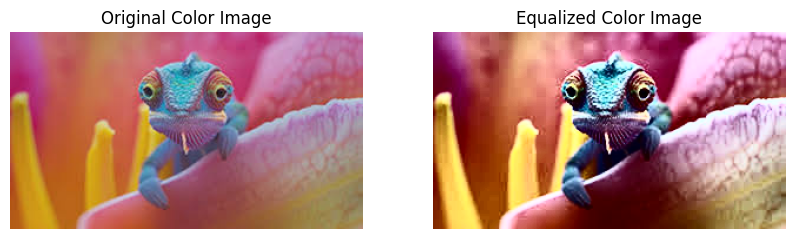

In [22]:
# Convert the image to YCrCb color space
image_ycrcb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YCrCb)

# Split the channels
y, cr, cb = cv2.split(image_ycrcb)

# Apply histogram equalization on the Y channel (luminance)
y_eq = cv2.equalizeHist(y)

# Merge the channels back
image_ycrcb_eq = cv2.merge([y_eq, cr, cb])

# Convert back to BGR color space
equalized_image_color = cv2.cvtColor(image_ycrcb_eq, cv2.COLOR_YCrCb2BGR)
equalized_image_color_rgb = cv2.cvtColor(equalized_image_color, cv2.COLOR_BGR2RGB)

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_color_rgb)
plt.title('Equalized Color Image')
plt.axis('off')
plt.show()


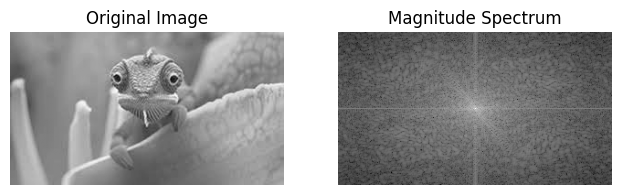

In [28]:
import numpy as np
img_path = '/content/download.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
fft_img=np.fft.fft2(img)
fft_shift=np.fft.fftshift(fft_img)
mag_spectrum=np.abs(fft_shift)
mag_log=np.log(mag_spectrum+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mag_log, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


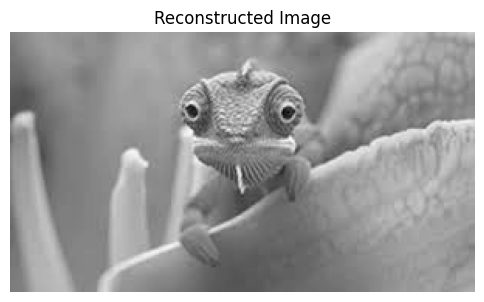

In [30]:
ifft_image = np.fft.ifft2(np.fft.ifftshift(fft_shift))
reconstructed_image = np.abs(ifft_image)
plt.figure(figsize=(6, 5))
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

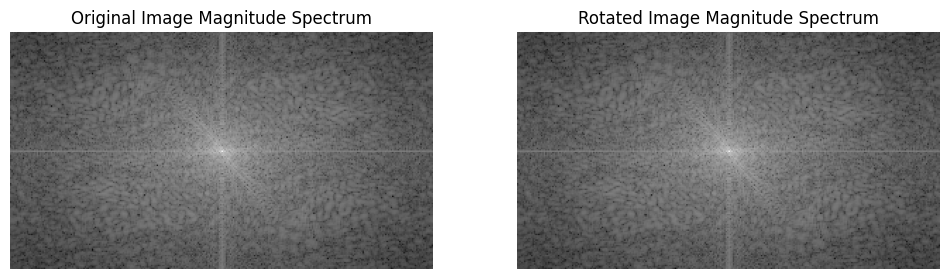

In [34]:
rotated_image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
fft_rotated_image = np.fft.fft2(rotated_image)
fft_rotated_shifted = np.fft.fftshift(fft_rotated_image)
magnitude_spectrum_rotated = np.abs(fft_rotated_shifted)
magnitude_spectrum_rotated_log = np.log(magnitude_spectrum_rotated + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(mag_log, cmap='gray')
plt.title('Original Image Magnitude Spectrum')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(mag_log, cmap='gray')
plt.title('Rotated Image Magnitude Spectrum')
plt.axis('off')
plt.show()